# Naive Bayes

### Problem Statement :- 

    - Classifying Spam or Ham

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Loading the data set

import pandas as pd
import numpy as np

sms = pd.read_csv("~/desktop/Digi 360/Module 22/Datasets-6/sms_raw_NB.csv", encoding = 'latin1')
sms.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


### Data Cleaning and Processing

In [11]:
# number of SMSes / documents
len(sms)

5559

In [12]:
# counting spam and ham instances
ham_spam = sms.type.value_counts()
ham_spam

ham     4812
spam     747
Name: type, dtype: int64

In [13]:
# Finding the spam rate

print("spam rate is about {0}%".format(
    round((ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100), 2))

spam rate is about 13.0%


In [14]:
# mapping labels to 0 and 1
sms.type = sms.type.map({'ham':0, 'spam':1})
sms.head()

,type,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,1,okmail: Dear Dave this is your final notice to...


### Splitting into Train and Test

In [16]:
# convert to X and y
X = sms.text
y = sms.type
print(X.shape)
print(y.shape)

(5559,)
(5559,)


In [17]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [19]:
X_train.head()

2438    Yeah like if it goes like it did with my frien...
1685    We have sent JD for Customer Service cum Accou...
5520    And stop being an old man. You get to build sn...
874     Or maybe my fat fingers just press all these b...
1495        Dude ive been seeing a lotta corvettes lately
Name: text, dtype: object

In [20]:
y_train.head()

2438    0
1685    0
5520    0
874     0
1495    0
Name: type, dtype: int64

### Vectorizing the sentences; removing stop words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [22]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [23]:
# printing the vocabulary
vect.vocabulary_

{'yeah': 7112,
 'like': 3832,
 'goes': 2958,
 'did': 2161,
 'friends': 2807,
 'imma': 3377,
 'flip': 2705,
 'half': 3084,
 'hour': 3278,
 'sent': 5589,
 'jd': 3544,
 'customer': 2003,
 'service': 5601,
 'cum': 1988,
 'accounts': 766,
 'executive': 2524,
 'ur': 6682,
 'mail': 4025,
 'id': 3344,
 'details': 2140,
 'contact': 1861,
 'stop': 6019,
 'old': 4575,
 'man': 4042,
 'build': 1460,
 'snowman': 5824,
 'snow': 5821,
 'angels': 919,
 'snowball': 5822,
 'fights': 2652,
 'maybe': 4101,
 'fat': 2605,
 'fingers': 2672,
 'just': 3607,
 'press': 5008,
 'buttons': 1484,
 'doesn': 2245,
 'know': 3690,
 'dude': 2332,
 'ive': 3511,
 'seeing': 5563,
 'lotta': 3935,
 'corvettes': 1895,
 'lately': 3752,
 'ill': 3368,
 'evening': 2490,
 'ideas': 3348,
 'probably': 5038,
 'won': 7015,
 'eat': 2367,
 'today': 6431,
 'think': 6343,
 'gonna': 2971,
 'pop': 4925,
 'weekend': 6908,
 'miss': 4201,
 'escape': 2471,
 'theatre': 6325,
 'going': 2961,
 'watch': 6866,
 'kavalan': 3635,
 'minutes': 4191,
 'mov

In [24]:
# vocab size
len(vect.vocabulary_.keys())

7191

In [25]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [26]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 2161)	1
  (0, 2705)	1
  (0, 2807)	1
  (0, 2958)	1
  (0, 3084)	1
  (0, 3278)	1
  (0, 3377)	1
  (0, 3832)	3
  (0, 7112)	1
  (1, 766)	1
  (1, 1861)	1
  (1, 1988)	1
  (1, 2003)	1
  (1, 2140)	1
  (1, 2524)	1
  (1, 3344)	1
  (1, 3544)	1
  (1, 4025)	1
  (1, 5589)	1
  (1, 5601)	1
  (1, 6682)	1
  (2, 919)	1
  (2, 1460)	1
  (2, 2652)	1
  (2, 4042)	1
  :	:
  (4166, 1369)	1
  (4166, 1575)	2
  (4166, 1594)	1
  (4166, 1996)	1
  (4166, 4097)	1
  (4166, 4305)	1
  (4166, 4884)	1
  (4166, 4955)	1
  (4166, 5581)	1
  (4166, 6242)	1
  (4166, 6682)	2
  (4166, 6805)	1
  (4167, 1108)	1
  (4167, 4190)	1
  (4168, 2265)	1
  (4168, 2490)	1
  (4168, 2492)	1
  (4168, 2973)	1
  (4168, 3144)	1
  (4168, 3720)	1
  (4168, 4563)	1
  (4168, 5847)	1
  (4168, 6367)	1
  (4168, 7042)	1
  (4168, 7056)	1


### Building the model

In [27]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)

### Model Evaluation

In [29]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9863309352517986

In [30]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1186,    4],
       [  15,  185]])

In [31]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1186    4]
 [  15  185]]


In [32]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.925


In [33]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.9966386554621849


#### Since specificity is 99.6%. We can conclude that our model correctly identified 99.6% of spam sms.

In [34]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9788359788359788
0.9788359788359788


In [35]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9788359788359788
PRECISION SCORE : 0.9788359788359788
RECALL SCORE : 0.925
F1 SCORE : 0.9511568123393317


### ROC Curve

In [36]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [37]:
# area under the curve
print (roc_auc)

0.9905042016806723


In [38]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000,0.000000
1,1.000000e+00,0.260,0.000000
2,1.000000e+00,0.265,0.000000
3,1.000000e+00,0.285,0.000000
4,1.000000e+00,0.295,0.000000
...,...,...,...
130,1.806235e-09,1.000,0.914286
131,1.224999e-09,1.000,0.915966
132,2.111161e-11,1.000,0.954622
133,2.027601e-11,1.000,0.956303


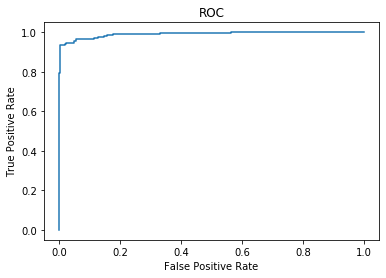

In [39]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

### Conclusion:- 

    - Overall accuracy of the model is 99%
    - Area under the curve is 99%
    - Since specificity is 99.6%. We can conclude that our model correctly identified 99.6% of spam sms.
    